# Bellabeat Data Analysis Case Study

# Project Overview
* Bellabeat is a small, successful company that has the potential to become a larger company in the global smart device market. 
* There is a need to analyze smart device fitness data to unlock new growth opportunities for the company. 
* The analysis focuses on one of Bellabeat's products. 
* The smart device data analysis is useful to gain insights into how consumers use Bellabeat's smart devices and will further guide the marketing strategy for the company. 
* Smart device usage data is viewed based on daily activity, calories, intensity, sleep time, and weight.
* This analysis uses 5 selected tables with a total of 45,618 queries from the entire database of 18 tables.
* The entire analysis using R programming language.

# About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

# Step 1: Ask
Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These questions will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Key tasks
1. Identify the business task
2. Consider key stakeholders

## Deliverable
A clear statement of the business task:
* Analyze smart device usage data to discover new growth opportunities and the resulting insights can develop marketing strategies for companies.

# Step 2: Prepare

## Key tasks
1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

## Deliverable
A description of all data sources used:

### Installing and loading the packages

R library used in this project as follows:

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)
library(tidyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Importing dataset
In this case study, using the FitBit Fitness Tracker Data dataset. After understanding the dataset consisting of 18 csv files, there are several tables used for the analysis process, which are as follows:
* dailyactivity
* hourlycalories
* hourlyintensities
* sleepday
* weightloginfo


In [2]:
activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Imported datasets are given variable names to simplify the next step. You can see the raw data in this **[LINK](http://www.kaggle.com/datasets/arashnic/fitbit)**

### Getting to know the data
To know more about the dataset, we need to use the function in R as follows:

In [3]:
glimpse(activity)
glimpse(calories)
glimpse(intensities)
glimpse(sleep)
glimpse(weight)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

After we look at the dataset above, there is a **data type error** in the column stating the **date** and **time**. Therefore, it is necessary to adjust the format to replace the wrong data type. The format adjustment will be done in the next step.

# Step 3: Process

## Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.

## Deliverable
Documentation of any cleaning or manipulation of data:

### Manipulating and fixing the data
Data type adjustments are made to each variable that has been named previously. Keep in mind, that this process is very important to avoid irrelevant analysis results.

**Activity**

In [4]:
activity$ActivityDate = as.POSIXct(activity$ActivityDate, format = "%m/%d/%Y", 
                                 tz = Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
glimpse(activity)

Rows: 940
Columns: 16
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <dttm> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

**Calories**

In [5]:
calories$ActivityHour = as.POSIXct(calories$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p", 
                                 tz = Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
glimpse(calories)

Rows: 22,099
Columns: 5
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12 02:…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …
$ time         <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:00:00…
$ date         <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16", "04/12/16…


**Intensities**

In [6]:
intensities$ActivityHour = as.POSIXct(intensities$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p",
                                    tz = Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
glimpse(intensities)

Rows: 22,099
Columns: 6
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <dttm> 2016-04-12 00:00:00, 2016-04-12 01:00:00, 2016-04-12…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…
$ time             <chr> "00:00:00", "01:00:00", "02:00:00", "03:00:00", "04:0…
$ date             <chr> "04/12/16", "04/12/16", "04/12/16", "04/12/16", "04/1…


**Sleep**

In [7]:
sleep$SleepDay = as.POSIXct(sleep$SleepDay, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")
glimpse(sleep)

Rows: 413
Columns: 6
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-16, 20…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
$ date               <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/16", "04…


After checking again, the data is correct and ready to be used in the next step.

# Step 4: Analyze

## Key tasks
1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

## Deliverable
A summary of your analysis:

### Exploring and summarizing the data
#### Distinct "id" value

In [8]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

We can see that:
1. There are 33 unique values in the **activity**, **calories**, and **intensities** dataframes.
2. There are 24 unique values in the **sleep** dataframe, and
3. There are only 8 unique values in the **weight** dataframe.

The **weight** dataframe, which only has **8 unique values**, is certainly **not ideal** for analysis in the next step.

### Summary statistic

In [9]:
# Activity
activity %>% 
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>% 
  summary()

activity %>% 
  select(VeryActiveMinutes, LightlyActiveMinutes, FairlyActiveMinutes) %>% 
  summary()

# Calories
calories %>% 
  select(Calories) %>% 
  summary()

# Sleep
sleep %>% 
  select(TotalTimeInBed, TotalMinutesAsleep, TotalSleepRecords) %>% 
  summary()

# Weight
weight %>% 
  select(BMI, WeightKg) %>% 
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes LightlyActiveMinutes FairlyActiveMinutes
 Min.   :  0.00    Min.   :  0.0        Min.   :  0.00     
 1st Qu.:  0.00    1st Qu.:127.0        1st Qu.:  0.00     
 Median :  4.00    Median :199.0        Median :  6.00     
 Mean   : 21.16    Mean   :192.8        Mean   : 13.56     
 3rd Qu.: 32.00    3rd Qu.:264.0        3rd Qu.: 19.00     
 Max.   :210.00    Max.   :518.0        Max.   :143.00     

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalTimeInBed  TotalMinutesAsleep TotalSleepRecords
 Min.   : 61.0   Min.   : 58.0      Min.   :1.000    
 1st Qu.:403.0   1st Qu.:361.0      1st Qu.:1.000    
 Median :463.0   Median :433.0      Median :1.000    
 Mean   :458.6   Mean   :419.5      Mean   :1.119    
 3rd Qu.:526.0   3rd Qu.:490.0      3rd Qu.:1.000    
 Max.   :961.0   Max.   :796.0      Max.   :3.000    

      BMI           WeightKg     
 Min.   :21.45   Min.   : 52.60  
 1st Qu.:23.96   1st Qu.: 61.40  
 Median :24.39   Median : 62.50  
 Mean   :25.19   Mean   : 72.04  
 3rd Qu.:25.56   3rd Qu.: 85.05  
 Max.   :47.54   Max.   :133.50  

Based on the summary statistics, there are the following key findings:

1. The average user utilizes his/her **daily activity** with **7638 steps**. This average value is not in line with the WHO recommendation of a minimum of **8,000 steps** or more per day.
2. Based on the average value of **sedentaryminutes**, most users do not move for 991 minutes or 16 hours. There is a need for reminder notifications on smart devices, to make users do more movement or activity so that **sedentaryminutes** can be reduced.
3. Most users do activities that are categorized as **light** in minutes, compared to activities that are categorized as **moderate** or **high**.
4. Based on the average **BMI value of 25.56**, which means that users are classified as **obese**. This result is still not in accordance with the **recommended normal BMI** value which is between **18.5 - 22.9**. There is a need for additional features in the device to make users more aware of BMI values and provide attractive solution options to reduce them.

# Step 5: Share

## Key tasks
1. Determine the best way to share your findings.
2. Create effective data visualizations.
3. Present your findings.
4. Ensure your work is accessible.

## Deliverable
Supporting visualizations and key findings:

### Visualization
This data visualization will display several relationships and insights that will be useful in making the final conclusion of recommendations in the last stage of this project.

#### Total Steps vs. Calories (Activity)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


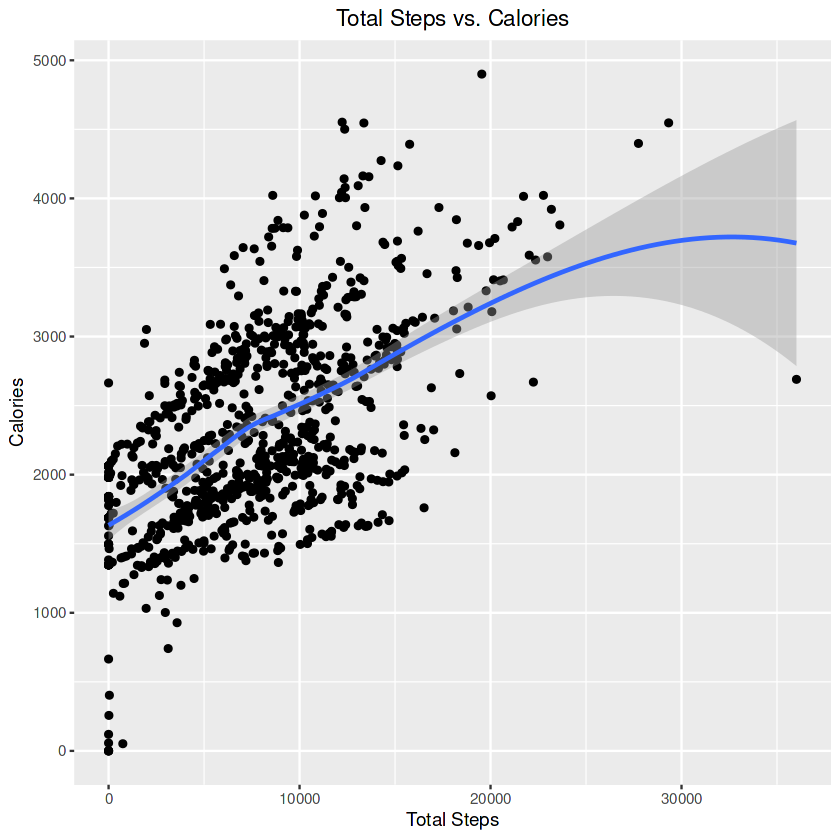

In [10]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() + geom_smooth() + labs(title = "Total Steps vs. Calories") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Calories") + xlab("Total Steps")

* There is a positive correlation between total steps and calories. As the total steps increase, the number of calories will increase.

#### Total Minutes Asleep vs. Total Time in Bed (Sleep)

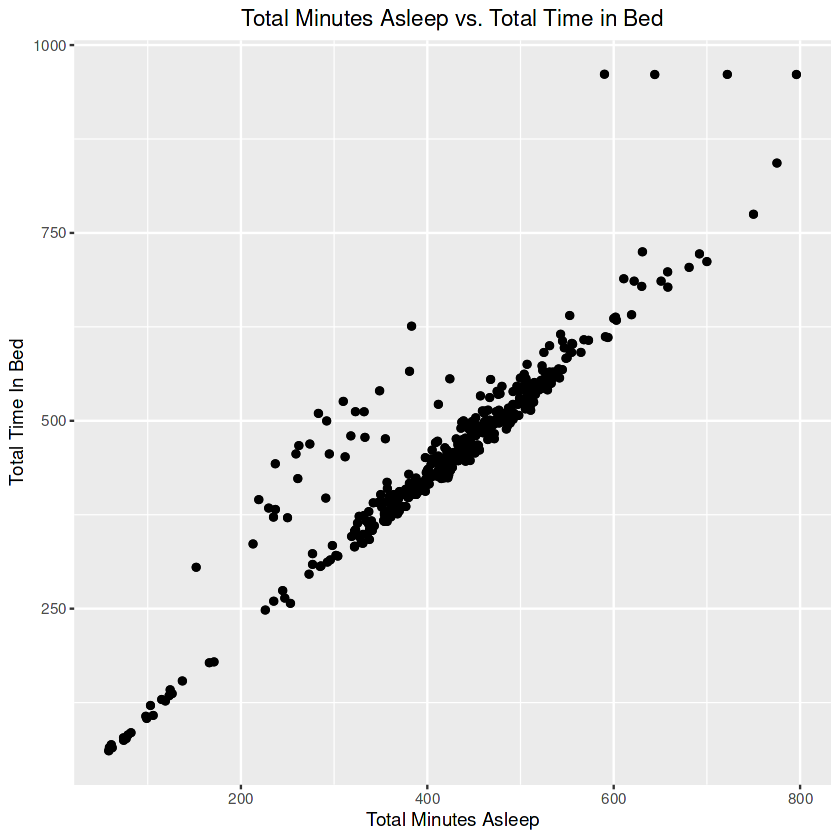

In [11]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point() + labs(title = "Total Minutes Asleep vs. Total Time in Bed") +
  theme(plot.title = element_text(hjust = 0.5)) + geom_jitter() +
  ylab("Total Time In Bed") + xlab("Total Minutes Asleep")

* There is a linear relationship between sleep duration and total time in bed. The more time spent in bed, the longer the sleep duration. 
* However, there is a need to improve the quality of sleep by informing the right time to sleep by providing automatic reminders of bedtime. 
* If necessary, it is equipped with an automatic alarm/reminder if the sleep time is excessive (in accordance with health recommendations by WHO or health experts) and encourages users to move immediately.

#### Average Total Intensity vs. Time (Intensities)

To display the average intensity data per unit time, it is necessary to first find the average intensity value as follows:

In [12]:
intensities2 <- intensities %>% 
  group_by(time) %>% 
  drop_na() %>% 
  summarise(mean_int= mean(TotalIntensity))

Warning message in geom_histogram(stat = "identity", fill = "lightblue"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


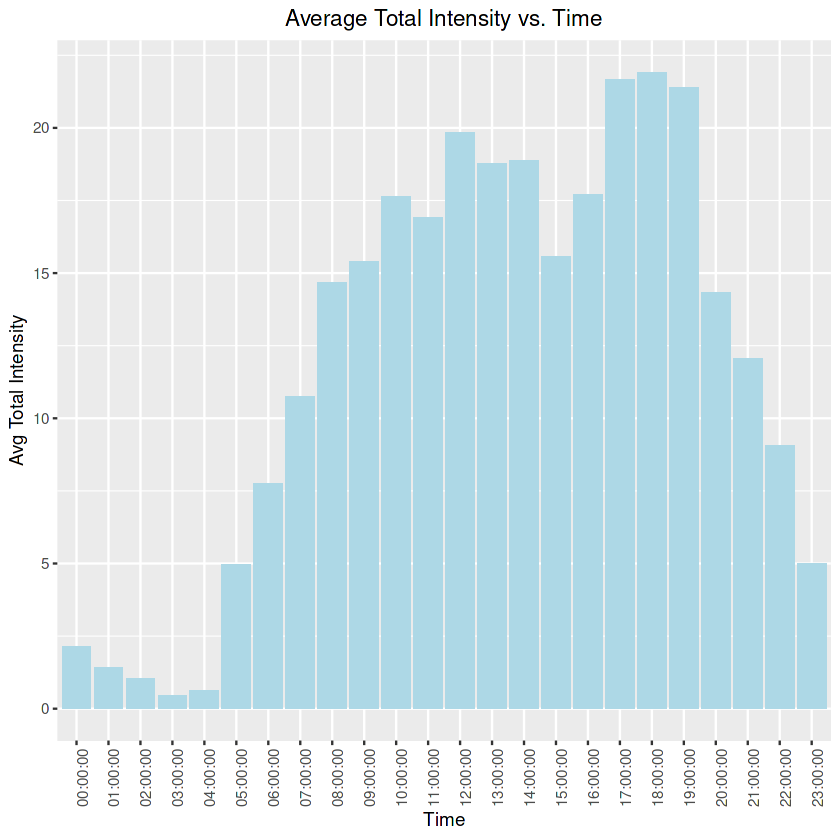

In [13]:
ggplot(data=intensities2, aes(x=time, y=mean_int)) +
  geom_histogram(stat = "identity", fill = "lightblue") + 
  theme(axis.text.x = element_text(angle = 90)) +
  theme(plot.title = element_text(hjust = 0.5)) +
  ylab("Avg Total Intensity") + xlab("Time") +
  labs(title = "Average Total Intensity vs. Time")

* The range of user intensity starts to increase from 5 am to 10 pm.
* The highest intensity occurs from 5 pm to 7 pm. I estimate that the majority of users utilize this time frame to increase their intensity by exercising after work.
* Maybe an automatic reminder can be given to users to exercise during the time range with the highest intensity, which is 5 - 7 pm.

#### Minutes Asleep vs. Sedentary Minutes (Merged data (activity & sleep))

To find the relationship between minutes asleep and sedentary minutes, where the variables are in different dataframes, it is necessary to merge the data first

In [14]:
# Merging between activity and sleep data (for visualization)
merged_data1 <- merge(sleep,activity, by = c("Id", "date"))
n_distinct(merged_data1)
glimpse(merged_data1)

[1] 410

Rows: 413
Columns: 20
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <chr> "04/12/16", "04/13/16", "04/15/16", "04/16/16…
$ SleepDay                 <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSleepRecords        <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep       <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, …
$ TotalTimeInBed           <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, …
$ ActivityDate             <dttm> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ TotalSteps               <int> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActive

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


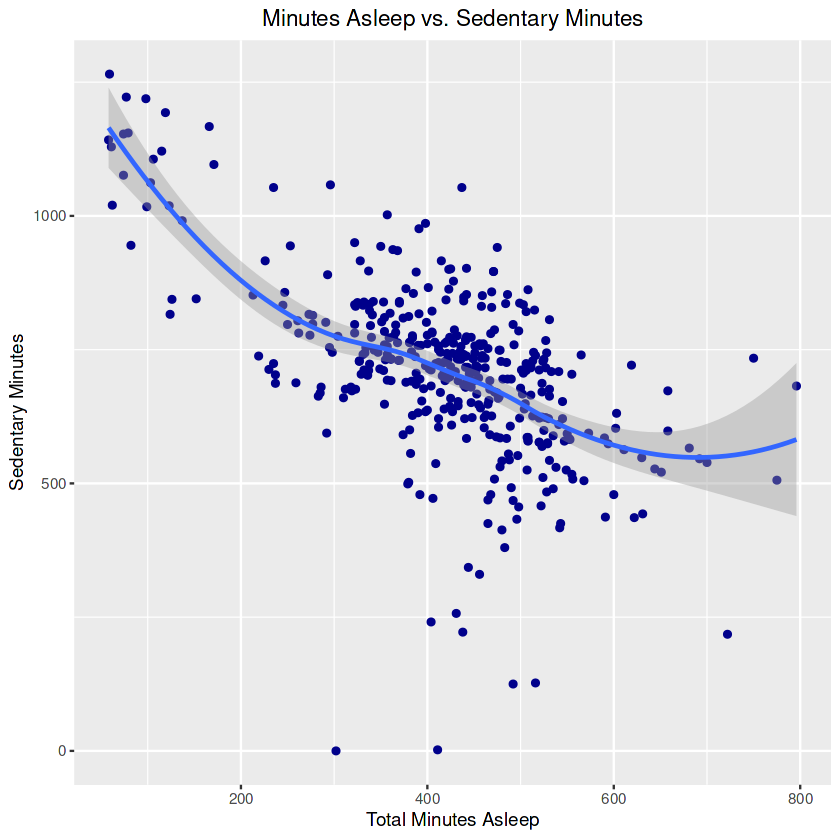

In [15]:
ggplot(data=merged_data1, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
  geom_point(color="darkblue") + geom_smooth() + labs(title = "Minutes Asleep vs. Sedentary Minutes") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  ylab("Sedentary Minutes") + xlab("Total Minutes Asleep")

* There is a negative correlation between sedentary time and sleep duration
* Sleep quality needs to be improved by telling users when to sleep to reduce sedentary time. This improvement in sleep quality will make users more productive in doing many activities that are beneficial to their health.

# Step 6: Act

## Key tasks
1. Create your portfolio.
2. Add your case study.
3. Practice presenting your case study to a friend or family member.

## Deliverable
Your top high-level insights based on your analysis:

### Final conclusion and recommendations for the Bellabeat
The data used to formulate the conclusions consisted of daily activity, calories, intensity, sleep time, and weight, which includes the user's habits in using Bellabeat smart devices. Despite the limited data available and the number of respondents, the conclusions of the results and recommendations will hopefully provide an overview of smart device usage that is useful for developing marketing strategies for Bellabeat products. There are some key findings and recommendations as follows:
* The data shows an increase in the intensity of using Bellabeat smart devices between 5 pm - 7 pm. This indicates that most female users increase their intensity to exercise after work. For this reason, Bellabeat's product sales target is recommended for women who work full-time from morning to evening.
* The average number of 7638 steps has not reached the WHO recommended value. This indicates that users of this smart device have not realized the importance of maintaining their health. Bellabeat needs to create an online campaign for users and non-users about the health benefits of doing activities that result in a minimum of 8,000 steps or more a day. The existence of this campaign will attract new users to use Bellabeat because they (new users) feel educated in maintaining a healthy body.
* The sedentary minutes value reveals that users are sedentary in their daily lives. Therefore, there is a need for a "challenge" feature in the Bellabeat app that will encourage users to move their bodies. Each user who successfully completes the challenge is given a reward, e.g. discounted membership fee if necessary. This challenge feature will provide a new experience for users and can attract new users to use the Bellabeat app.
* Based on the user's BMI value, there is a need for additional features in the Bellabeat application. The feature is a recommendation for activities that can lose weight even when the user is busy working (based on the average intensity over a period of time).
* Improving sleep quality is important to reduce sedentary minutes for users. Therefore, the addition of an automatic reminder feature to let users know when to sleep according to health recommendations would be beneficial for users to improve their sleep quality.